<a href="https://colab.research.google.com/github/ralph27/Matplotlib-visualization/blob/master/DL_Models_in_Keras_%26_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Deep Learning Models with Keras
© 2024, Zaka AI, Inc. All Rights Reserved.

---



**Objective:** In the first part of this notebook exercise, you will learn how to build Artficial Neural Networks for deep learning models using the Keras library integrated in TensorFlow as of version 2.0. Keras is a minimalist Python library which made building DL models simple and straightforward.

We will be exploring how to build and train a neural network model using both of the Keras Sequential and Functional APIs.


## Defining a Sequential model

The first exercise for this colab is building an artificial neural network using the Keras sequential model.
The library we need is `tensorflow.keras.models`



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(4, input_dim = 2, activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(1, activation = "sigmoid"))

# print model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 6)                 30        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 49 (196.00 Byte)
Trainable params: 49 (196.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Reminder: `Dense` refers to a fully connected layer (meaning all the neurons of a layers are connected to all the neurons in the following layer).

This how the ReLU function looks like:

![alt text](https://qph.fs.quoracdn.net/main-qimg-9e3b87e175577fe97da51fd1a2b50eac)

*source:* https://qph.fs.quoracdn.net/main-qimg-9e3b87e175577fe97da51fd1a2b50eac

And this is the sigmoid function which squashes values to the interval [0;1]:

![alt text](https://qph.fs.quoracdn.net/main-qimg-6b67bea3311c3429bfb34b6b1737fe0c)

*source:* https://qph.fs.quoracdn.net/main-qimg-6b67bea3311c3429bfb34b6b1737fe0c

## Visualizing the model

Using plot_model, Keras allows us to visually portray the artificial network we have built with input layer, hidden layers and an output layer.

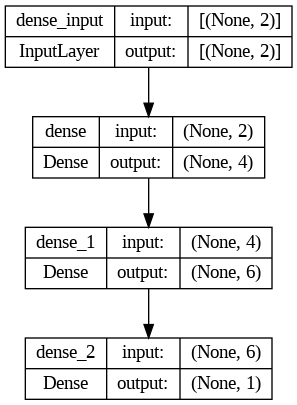

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

## Functional API
Unlike the sequential model, the functional model allows for complex interactions between layers. As you'll notice, in this model, we create the input layer apart and then link all the layers to one another using brackets ( ) at the end of the definition.

We will need two extra libraries on before:
* `tensorflow.keras.utils`
* `tensorflow.keras.layers`

We will also be using plot_model to visualize this functional API model.



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 20)                220       
                                                                 
 dense_5 (Dense)             (None, 10)                210       
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 551 (2.15 KB)
Trainable params: 551 (2.15 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


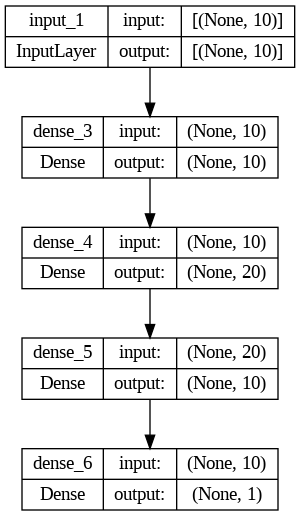

In [ ]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense

# define input
visible = Input(shape=(10,))

# connect layers
layer1 = Dense(10, activation='relu')(visible)
layer2 = Dense(20, activation='relu')(layer1)
layer3 = Dense(10, activation='relu')(layer2)
layer4 = Dense(1, activation='sigmoid')(layer3)

# finally, we create the model
model = Model(inputs=visible, outputs=layer4)

# summarize layers
model.summary()

# plot graph
plot_model(model, to_file='multilayer_perceptron_graph.png',  show_shapes=True, show_layer_names=True)

## Model training

In this code cell, the steps for building, compiling and training the model are described.
1. First build the neural network with activation functions
2. Compile the model by choosing an optimization algorithm (stochastic gradient descent for this example) and a loss (cost) function to optimize. Since the output neuron is singular with a sigmoid activation function, we will use binary_crossentropy.
3. We generated random data just for the sake of describing the way to train an ANN (artificial neural network)
4. Train the model using the `fit()` function choosing batch size and epochs.
5. Use the trained model to predict on new unseen data.

Since this is a random data set, the predicted output is not very meaningful but the purpose is to show the ***compile*** and ***train*** steps when developping a Deep Learning Model.

In [ ]:
# build model
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=100))
model.add(Dense(1, activation='sigmoid'))

# compile model
model.compile(optimizer='sgd',
              loss='binary_crossentropy', # categorical crossentry, MSE = 0.5(y-y_hat)^2
              metrics=['accuracy'])

# Generate dummy data
import numpy as np
data = np.random.random((100000, 100))
labels = np.random.randint(2, size=(100000, 1))

# Train the model, iterating on the data in batches of 32 samples
model.fit(data, labels, epochs=10, batch_size=32)

# predict
data_example = np.random.random((1, 100))
model.predict(data_example)

Epoch 1/10
3125/3125 [==============================] - 13s 4ms/step - loss: 0.6997 - accuracy: 0.5022
Epoch 2/10
3125/3125 [==============================] - 8s 3ms/step - loss: 0.6947 - accuracy: 0.5033
Epoch 3/10
3125/3125 [==============================] - 5s 2ms/step - loss: 0.6938 - accuracy: 0.5061
Epoch 4/10
3125/3125 [==============================] - 4s 1ms/step - loss: 0.6935 - accuracy: 0.5049
Epoch 5/10
3125/3125 [==============================] - 4s 1ms/step - loss: 0.6933 - accuracy: 0.5072
Epoch 6/10
3125/3125 [==============================] - 5s 2ms/step - loss: 0.6932 - accuracy: 0.5071
Epoch 7/10
3125/3125 [==============================] - 5s 1ms/step - loss: 0.6932 - accuracy: 0.5064
Epoch 8/10
3125/3125 [==============================] - 5s 2ms/step - loss: 0.6931 - accuracy: 0.5084
Epoch 9/10
3125/3125 [==============================] - 5s 1ms/step - loss: 0.6930 - accuracy: 0.5086
Epoch 10/10
1/1 [==============================] - 0s 77ms/step


array([[0.5075126]], dtype=float32)

# Custom model

Let's build this model using both Sequential & Functional APIs. This exercise will help you apply everything we went through in this notebook. Good luck!
![alt text](https://miro.medium.com/max/1400/1*3fA77_mLNiJTSgZFhYnU0Q@2x.png)

In [ ]:
# Sequential

model = Sequential()
model.add(Dense(4, activation="relu", input_dim=3))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 4)                 16        
                                                                 
 dense_10 (Dense)            (None, 4)                 20        
                                                                 
 dense_11 (Dense)            (None, 1)                 5         
                                                                 
Total params: 41 (164.00 Byte)
Trainable params: 41 (164.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Functional API

input_layer = Input(shape=3)
hidden1 = Dense(4, activation="relu")(input_layer)
hidden2 = Dense(4, activation="relu")(hidden1)
output_layer = Dense(1, activation="sigmoid")(hidden2)

model = Model(inputs=input_layer, outputs=output_layer)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense_12 (Dense)            (None, 4)                 16        
                                                                 
 dense_13 (Dense)            (None, 4)                 20        
                                                                 
 dense_14 (Dense)            (None, 1)                 5         
                                                                 
Total params: 41 (164.00 Byte)
Trainable params: 41 (164.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Part 2: Build a Feed Forward Neural Network with Pytorch



Objective: The goal of this second part is to get you acquainted with PyTorch as we learn how to build a Feed Forward Neural Network that will be able to classify between different types of flowers. You'll also import the dataset directly from GitHub, and use libraries that you should already be familiar with.

## Importing Libraries and Data

Let's start by importing the necessary libraries:

**torch**: Imports the PyTorch library for machine learning tasks, especially neural networks.

**torch.nn**: Brings in PyTorch's neural network module providing tools for network construction.

**torch.nn.functional**: Imports PyTorch's functional API for operations like activations and losses.

**numpy**: Imports NumPy, a fundamental library for numerical computations in Python.

**pandas**: Brings in Pandas, useful for data manipulation and analysis with DataFrames.

**matplotlib**: Imports Matplotlib for creating visualizations and plots in Python.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We will clone our dataset directly from github into our colab workspace

In [ ]:
# clone git repo
!git clone https://github.com/zaka-ai/intro2dl.git

# change directory
%cd intro2dl/data/

Cloning into 'intro2dl'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 16 (delta 1), reused 7 (delta 0), pack-reused 0
Receiving objects: 100% (16/16), 52.95 KiB | 1.20 MiB/s, done.
Resolving deltas: 100% (1/1), done.
/content/intro2dl/data


Now we store our dataset into a dataframe that can be used by our libraries

In [ ]:
from pandas import read_csv

# load dataset
dataframe = read_csv("iris.csv", header=None)
dataframe.columns = ["sepal length (cm)",
                   "sepal width (cm)",
                   "petal length (cm)",
                   "petal width (cm)",
                   "species"]

dataframe.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Dealing with the Dataset

Let's start by mapping each class to a numerical value so it can be understood by our machine more easily

In [ ]:
mappings = {
   "Iris-setosa": 0,
   "Iris-versicolor": 1,
   "Iris-virginica": 2
}
dataframe["species"] = dataframe["species"].apply(lambda x: mappings[x])

dataframe.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


We can now split our input features X from our output features Y. This can be done with simple python code

In [ ]:
# split X and Y features
dataset = dataframe.values
print(dataset.shape)
X = dataset[:,0:4].astype(float)
Y = dataset[:,4]

(150, 5)


## Splitting for Training and Testing

Let's use the train_test_split function to split our data between training and testing with 20% division size

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.20)

Now we transform our data from NumPy arrays to PyTorch Tensors, preparing them for consumption by a PyTorch model by utilizing specific data types (FloatTensor for input features and LongTensor for target labels).

In [ ]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)


Let's visualize the train and test shapes for the input features

In [ ]:
print(X_train.shape)
print(X_test.shape)

torch.Size([120, 4])
torch.Size([30, 4])


## Creating the Neural Network with Pytorch

Creating a neural network model by PyTorch is not complicated.

Our model will have following structure:



*   Fully Connected Layer 4 input features, 25 output features

*   Fully Connected Layer 25 input features, 30 output features


*   Output Layer 30 input features , 3 output features


Here we choose hidden layers’ neurons as arbitrary (25 and 30 respectively).
We will use ReLU (rectified linear unit) as activation function. In PyTorch there’s a module torch.nn.ReLU gives us that we need.

In [ ]:
class Model(nn.Module):
    def __init__(self, input_features=4, hidden_layer1=25, hidden_layer2=30, output_features=3):
        super().__init__()
        self.fc1 = nn.Linear(input_features,hidden_layer1)
        self.fc2 = nn.Linear(hidden_layer1, hidden_layer2)
        self.out = nn.Linear(hidden_layer2, output_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

Let's now set our hyperparameters

*   We start with learning rate 0.01 then we can work on and see its effect on the training process

*   Also we will use Cross Entropy and Adam optimizer.



In [ ]:
criterion = nn.CrossEntropyLoss()
model=Model()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

Let's create our training loop with a 100 epochs, computing predictions, calculating losses, updating the model's weights via optimization, and storing the losses for each epoch.

In [ ]:
epochs = 100
losses = []

for i in range(epochs):
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    print(f'epoch: {i:2}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch:  0  loss: 1.20380473
epoch:  1  loss: 1.03926599
epoch:  2  loss: 1.03504813
epoch:  3  loss: 1.00034475
epoch:  4  loss: 0.93800676
epoch:  5  loss: 0.87978184
epoch:  6  loss: 0.82691371
epoch:  7  loss: 0.77817696
epoch:  8  loss: 0.73098636
epoch:  9  loss: 0.68101400
epoch: 10  loss: 0.63070267
epoch: 11  loss: 0.58618468
epoch: 12  loss: 0.54974759
epoch: 13  loss: 0.52044326
epoch: 14  loss: 0.49424300
epoch: 15  loss: 0.46898094
epoch: 16  loss: 0.44560096
epoch: 17  loss: 0.42540610
epoch: 18  loss: 0.40599138
epoch: 19  loss: 0.38446555
epoch: 20  loss: 0.36346382
epoch: 21  loss: 0.34459966
epoch: 22  loss: 0.32340986
epoch: 23  loss: 0.30192283
epoch: 24  loss: 0.28295603
epoch: 25  loss: 0.26195067
epoch: 26  loss: 0.24379215
epoch: 27  loss: 0.22555618
epoch: 28  loss: 0.20822078
epoch: 29  loss: 0.19297791
epoch: 30  loss: 0.17814970
epoch: 31  loss: 0.16573986
epoch: 32  loss: 0.15369517
epoch: 33  loss: 0.14362738
epoch: 34  loss: 0.13459726
epoch: 35  loss: 0.1

Now let's test it!

In [ ]:
unknown_iris = torch.tensor([4.0,3.3,2.7,1.5])
with torch.no_grad():
  print(model(unknown_iris))
  val=  model(unknown_iris).argmax()

if val == 0:
  print('These features represent Iris-setosa')
elif val == 1:
  print('These features represent Iris-Virginica')
elif val == 2:
  print('These features represent Iris-Versicolor')


tensor([ 2.7591,  6.6473, -4.7794])
These features represent Iris-Virginica
